In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Simple Linear Regression

In [4]:
df_fuelC = pd.read_csv('FuelConsumptionCo2.csv')

In [5]:
df_fuelC.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df_fuelC.drop(['FUELTYPE','FUELCONSUMPTION_COMB_MPG'], axis=1, inplace=True)

In [8]:
df_fuelC.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,244


# Data Exploration

In [9]:
# summarize the data
df_fuelC.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [10]:
#Lets select some features to explore more.
cdf = df_fuelC[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


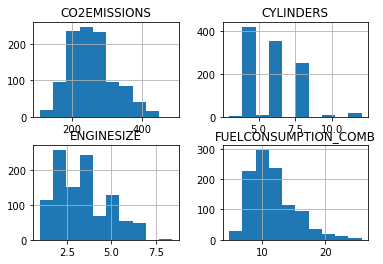

In [11]:
#we can plot each of these features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Lets plot each of these features vs the Emission, to see how linear is their relation:

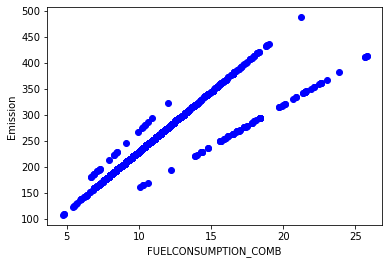

In [12]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

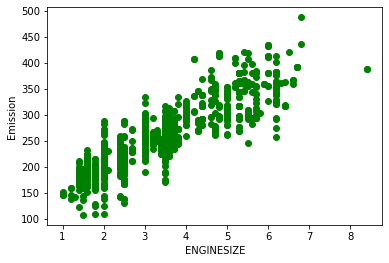

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')
plt.show()

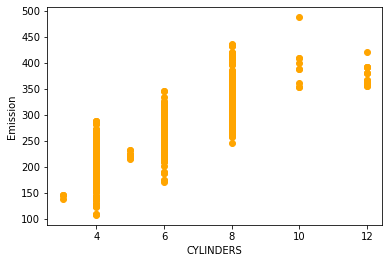

In [14]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='orange')
plt.xlabel('CYLINDERS')
plt.ylabel('Emission')
plt.show()

# Creating train and test dataset

In [24]:
msk = np.random.rand(len(df_fuelC)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

Train data distribution

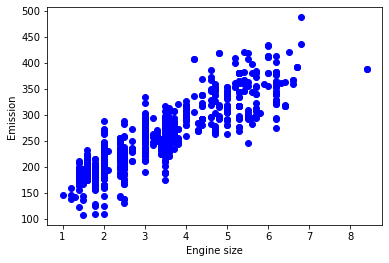

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Modeling

Using sklearn package to model data.

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#the coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.0542814]]
Intercept:  [125.82051526]


# Plot outputs
we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

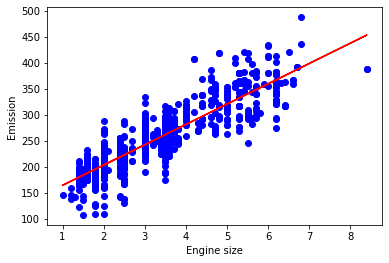

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluation

In [28]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.48
Residual sum of squares (MSE): 920.02
R2-score: 0.69


we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

# Non Linear Regression Analysis

recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y = 2*(x) + 3.

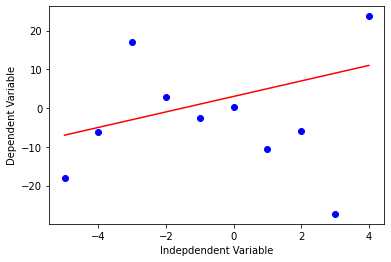

In [31]:
x = np.arange(-5.0, 5.0, 1.0)

#We can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size = x.size)
y_data = y * y_noise
#plt.figure(figsize=(8,6)
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of  𝑘  degrees (maximum power of  𝑥 ).

 𝑦=𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑 
 
Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example:<br>
𝑦=log(𝑥)
 
Or even, more complicated such as :
𝑦=log(𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑)

# Cubic function's graph.

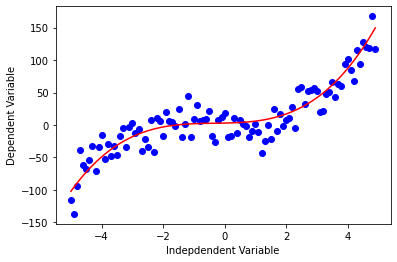

In [32]:
x = np.arange(-5.0, 5.0, 0.1)

#We can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Indepdendent Variable')
plt.ylabel('Dependent Variable')
plt.show()

# Quadratic
𝑌=𝑋2

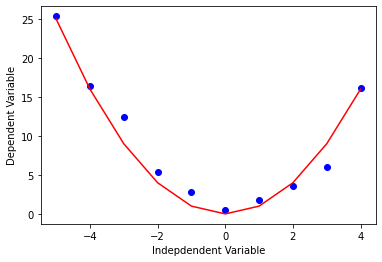

In [33]:
x = np.arange(-5.0, 5.0, 1.0)

y = np.power(x, 2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y+y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Exponential

An exponential function with base c is defined by 
$$ 𝑌=𝑎+𝑏𝑐^𝑋 $$

where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.

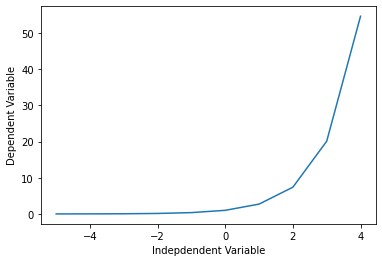

In [34]:
x = np.arange(-5.0, 5.0, 1.0)

y = np.exp(x)

plt.plot(x, y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Logarithmic

The response  𝑦  is a results of applying logarithmic map from input  𝑥 's to output variable  𝑦 . It is one of the simplest form of log(): i.e. <br>

𝑦=log(𝑋)

<ipython-input-35-1852260e7ac6>:3: RuntimeWarning: divide by zero encountered in log
  Y = np.log(X)
<ipython-input-35-1852260e7ac6>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


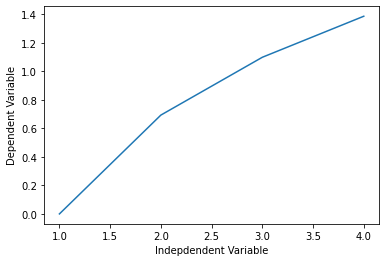

In [35]:
X = np.arange(-5.0, 5.0, 1.0)

Y = np.log(X)

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

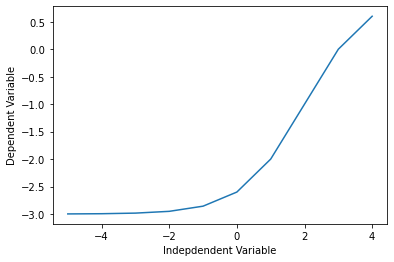

In [36]:
X = np.arange(-5.0, 5.0, 1.0)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Non-Linear Regression example

we're going to try and fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [67]:
import numpy as np
import pandas as pd

#downloading dataset
#df = pd.read_csv("China_gdp.csv", skiprows=range(4))

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


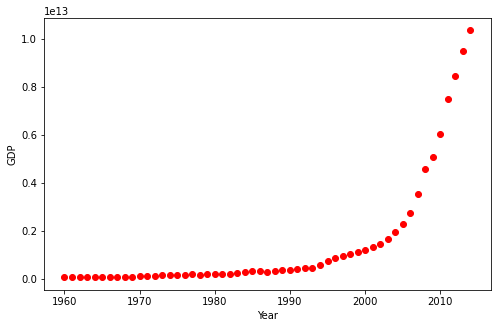

In [68]:
plt.figure(figsize=(8, 5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Choosing a model

we determine that the logistic function could be a good approximation

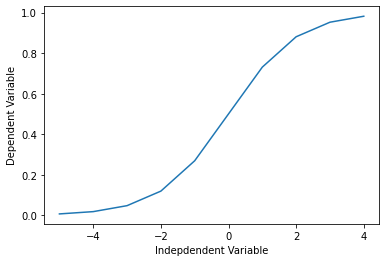

In [69]:
X = np.arange(-5.0, 5.0, 1.0)
Y = 1.0/(1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Building The Model

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [70]:
#build our regression model and initialize its parameters
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1 + np.exp(-Beta_1*(x-Beta_2)))
    
    return y

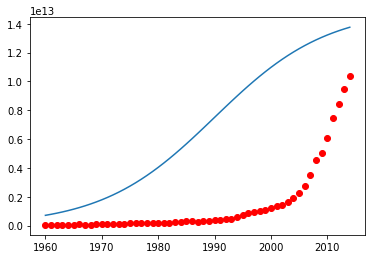

In [71]:
beta_1 = 0.10
beta_2 = 1990.0

#Logistic Function
Y_pred = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

# Lets first normalize our x and y:

In [77]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

# How we find the best parameters for our fit line?

We can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data

In [78]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


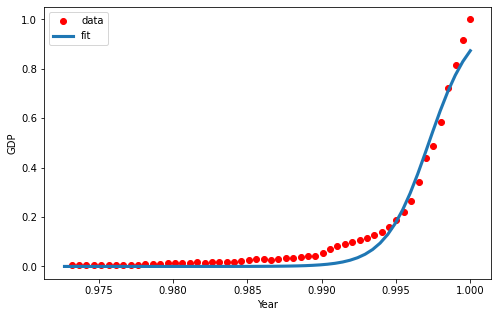

In [80]:
#plot the result regression model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.1, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Calculate what is the accuracy of our model

In [85]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.94
